<a href="https://colab.research.google.com/github/ImranRiazChohan/Cat-and-Dog-Classification-CNN-/blob/master/Cat_and_Dog_Classification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KGT COYOTE

## PREPARE


### IMPORT

In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

### DIRECTORIES

In [2]:
mix_dir="./COYODOG"
test_dir="./COYODOG"
train_dir="./COYODOG"

train_dir_predict = "./COYODOG/trainy"

test_data = "./DATA/coyodogs"


In [3]:
train_dir_coyote=os.path.join(train_dir,"trainy/coyote")
train_dir_dog=os.path.join(train_dir,"trainy/dogs")

test_dir_coyote=os.path.join(test_dir,"validy/coyote")
test_dir_dog=os.path.join(test_dir,"validy/dogs")

In [4]:
train_coyote_fnames = os.listdir( train_dir_coyote )
train_dog_fnames = os.listdir( train_dir_dog )
test_coyote_fnames = os.listdir( test_dir_coyote )
test_dog_fnames = os.listdir( test_dir_dog )

print(train_coyote_fnames[:5])
print(train_dog_fnames[:5])
print(test_coyote_fnames[:5])
print(test_dog_fnames[:5]) 

print("Train data Coyote: ",len(os.listdir(train_dir_coyote)))
print("Train data Dogs: ",len(os.listdir(train_dir_dog)))

print("Test Data Coyote: ",len(os.listdir(test_dir_coyote)))
print("Test Data Dog: ",len(os.listdir(test_dir_dog))) 

['coyote (1).jpeg', 'coyote (1).jpg', 'coyote (1).png', 'coyote (10).jpeg', 'coyote (10).jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']
['coyote (501).jpg', 'coyote (502).jpg', 'coyote (503).jpg', 'coyote (504).jpg', 'coyote (505).jpg']
['dog.6172.jpg', 'dog.6180.jpg', 'dog.6194.jpg', 'dog.6217.jpg', 'dog.6225.jpg']
Train data Coyote:  553
Train data Dogs:  300
Test Data Coyote:  183
Test Data Dog:  150


## VISUALIZE

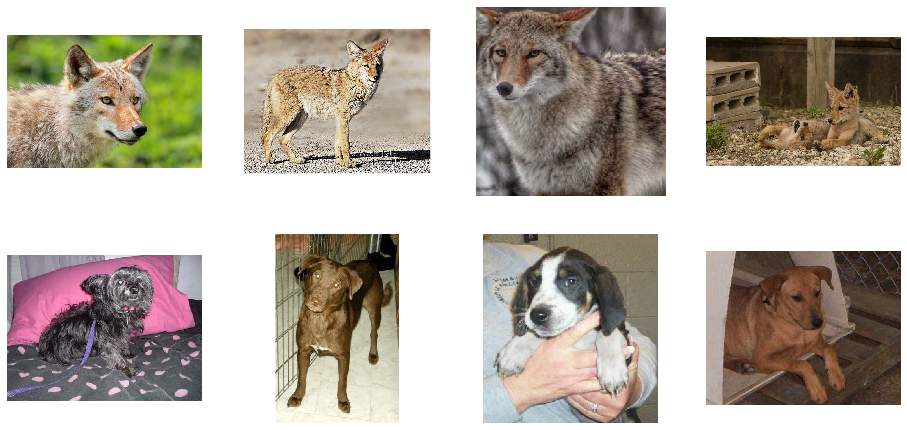

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_cat_pix = [os.path.join(train_dir_coyote, fname) 
                for fname in train_coyote_fnames[ pic_index-4:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dir_dog, fname) 
                for fname in train_dog_fnames[ pic_index-4:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

Create Small Model

## CREATE MODELS SMALL and BIG (epoch and steps small to quick test

### SMALL MODEL

In [6]:
def Create_model():
  model=tf.keras.models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation="relu"))
  model.add(layers.Dense(1,activation="sigmoid"))
  return model

In [7]:
model=Create_model()
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
____

### COMPILE

In [8]:
model.compile(tf.keras.optimizers.Adam(1e-4),tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### PROCESS IMAGE

In [9]:
train_datagen=ImageDataGenerator(rescale=1.0/255,rotation_range=40,
            width_shift_range=0.2,height_shift_range=0.2,
            shear_range=0.2,zoom_range=0.2,
            horizontal_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [10]:
train_gen=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode="binary",target_size=(150,150))
validation_gen=test_datagen.flow_from_directory(test_dir,batch_size=20,class_mode="binary",target_size=(150,150))

Found 1186 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.


### TRAIN MODEL

In [11]:
history=model.fit_generator(train_gen,epochs=3,steps_per_epoch=6,validation_data=validation_gen,validation_steps=20)

Epoch 1/3
6/6 [==============================] - 28s 5s/step - loss: 0.6073 - acc: 0.7083 - val_loss: 0.6115 - val_acc: 0.7175
Epoch 2/3
6/6 [==============================] - 16s 3s/step - loss: 0.5951 - acc: 0.7333 - val_loss: 0.5946 - val_acc: 0.7175
Epoch 3/3
6/6 [==============================] - 17s 3s/step - loss: 0.5895 - acc: 0.7333 - val_loss: 0.6026 - val_acc: 0.7175


In [12]:
model.save("smallmodel.h5")

###  ACCURACY and LOSS

In [13]:
accuracy=history.history["acc"]
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']
epochs=range(len(accuracy))

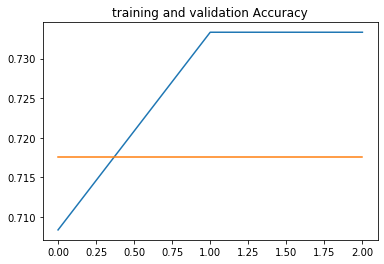

In [14]:
plt.plot(epochs,accuracy)
plt.plot(epochs,val_accuracy)
plt.title("training and validation Accuracy")
plt.show()

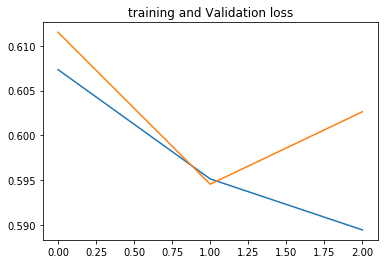

In [15]:
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("training and Validation loss")
plt.show()

### BIG MODEL REPEAT ALL

In [16]:
def Create_Large_model():
  model=tf.keras.models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
  model.add(layers.Conv2D(32,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(256,(3,3),activation='relu'))
  model.add(layers.Conv2D(256,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(512,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation="relu"))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1,activation="sigmoid"))
  return model

In [17]:
large_model=Create_Large_model()
large_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)      

In [18]:
large_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss="binary_crossentropy",metrics=['accuracy'])
History=large_model.fit_generator(train_gen,steps_per_epoch=6,epochs=6,validation_data=validation_gen,validation_steps=50)


Epoch 1/6
6/6 [==============================] - 63s 11s/step - loss: 0.6448 - acc: 0.7167 - val_loss: 0.6036 - val_acc: 0.7120
Epoch 2/6
6/6 [==============================] - 52s 9s/step - loss: 0.6061 - acc: 0.7358 - val_loss: 0.6029 - val_acc: 0.7120
Epoch 3/6
6/6 [==============================] - 55s 9s/step - loss: 0.6127 - acc: 0.7000 - val_loss: 0.5961 - val_acc: 0.7120
Epoch 4/6
6/6 [==============================] - 51s 9s/step - loss: 0.6018 - acc: 0.7167 - val_loss: 0.6016 - val_acc: 0.7120
Epoch 5/6
6/6 [==============================] - 53s 9s/step - loss: 0.5712 - acc: 0.7917 - val_loss: 0.6087 - val_acc: 0.7120
Epoch 6/6
6/6 [==============================] - 51s 8s/step - loss: 0.6585 - acc: 0.6583 - val_loss: 0.5957 - val_acc: 0.7120


In [19]:
Accuracy=History.history["acc"]
Loss=History.history['loss']
Val_accuracy=History.history['val_acc']
Val_loss=History.history['val_loss']
epochs=range(len(Accuracy))

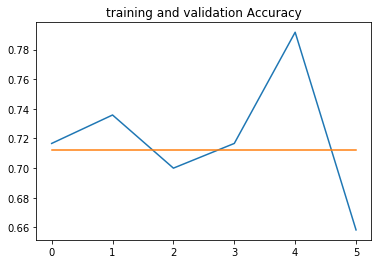

In [20]:
plt.plot(epochs,Accuracy)
plt.plot(epochs,Val_accuracy)
plt.title("training and validation Accuracy")
plt.show()

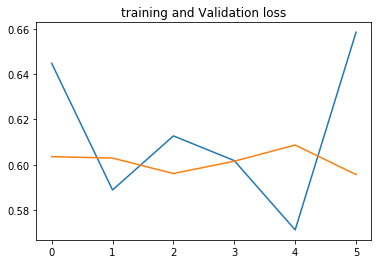

In [21]:
plt.plot(epochs,Loss)
plt.plot(epochs,Val_loss)
plt.title("training and Validation loss")
plt.show()

In [22]:
large_model.save("model.h5")

## PREDICTIONS

### IMAGE GENERATOR

In [23]:


Batch_size = 32
image_shape = 150



In [24]:
train_image_generator = ImageDataGenerator(
    # image augmentation
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True,
    rescale = 1./255 #normalize the image 
             )
test_image_generator = ImageDataGenerator(
    rescale = 1./255
             )


train_image_gen = train_image_generator.flow_from_directory(
batch_size = Batch_size,
directory = train_dir_predict,
shuffle = True,
target_size = (image_shape,image_shape),
class_mode= "binary")


test_image_gen =test_image_generator.flow_from_directory(
batch_size = Batch_size,
directory = test_dir,
shuffle = False,
target_size = (image_shape,image_shape),
class_mode= "binary")



Found 853 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices

{'coyote': 0, 'dogs': 1}

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [27]:
image = load_img("DATA/18.jpg", target_size=(image_shape, image_shape)) # load image and resize it to target_size

In [28]:
type(image)

PIL.Image.Image

In [29]:
img = img_to_array(image)

In [30]:
type(img)

numpy.ndarray

In [31]:
print(img.shape)

(150, 150, 3)


In [32]:
img = np.expand_dims(img, 0) # to add batch dimension.

In [33]:
img = img.astype(np.float32)/255.0 # normalize image

In [34]:
print(img.shape)

(1, 150, 150, 3)


### PREDICT MODEL

In [35]:
model.predict(img)

array([[0.2106328]], dtype=float32)

In [36]:
img0 = load_img("DATA/2.jpg",target_size=(image_shape,image_shape))
img0 = img_to_array(img0)
img0 = np.expand_dims(img0,0)
img0 = img0.astype(np.float32)/255.0
model.predict(img0)

array([[0.18788788]], dtype=float32)

In [37]:
def load_images(folder):
    outputs = []
    for f in os.listdir(folder):
        print(f)
        img = load_img(os.path.join(folder, f),target_size=(image_shape,image_shape))
        img = img_to_array(img)
        img = np.expand_dims(img,0)
        img = img.astype(np.float32)/255.0
        outputs.append(img)
    return np.concatenate(outputs)

In [38]:


def predict_classes(model, images, classes):
    output = []
    prediction = model.predict(images)

    class_label = {value:key for key, value in classes.items()}
    for p in prediction:
        if p> 0.5:
            output.append(class_label[1])
        else:
            output.append(class_label[0])
    return output



In [39]:
images = load_images("./DATA/minicoyo")

18.jpg
2.jpg
21.jpg
23.jpg


In [40]:
predict_classes(model, images, train_image_gen.class_indices)

['coyote', 'coyote', 'coyote', 'coyote']

###  NOW PLOT IMAGES

In [41]:
def predict_and_plot(model, image_folder):
    class2index = train_image_gen.class_indices
    index2class = {value:key for key, value in class2index.items()}
    image_files = os.listdir(image_folder)
    fig,axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for i in range(len(image_files)):
        image_file = image_files[i]
        img = load_img(os.path.join(image_folder, image_file),target_size=(image_shape,image_shape))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array,0)
        img_array = img_array.astype(np.float32)/255.0
        
        prediction = model.predict_classes(img_array.reshape(-1, image_shape, image_shape, 3))[0][0]

        axes[i].set_title("predicted:"+index2class[prediction])
        img_array = img_to_array(img)
        
        axes[i].imshow(img_array.astype(np.uint8))
        plt.tight_layout()
 
    
        
    plt.show()

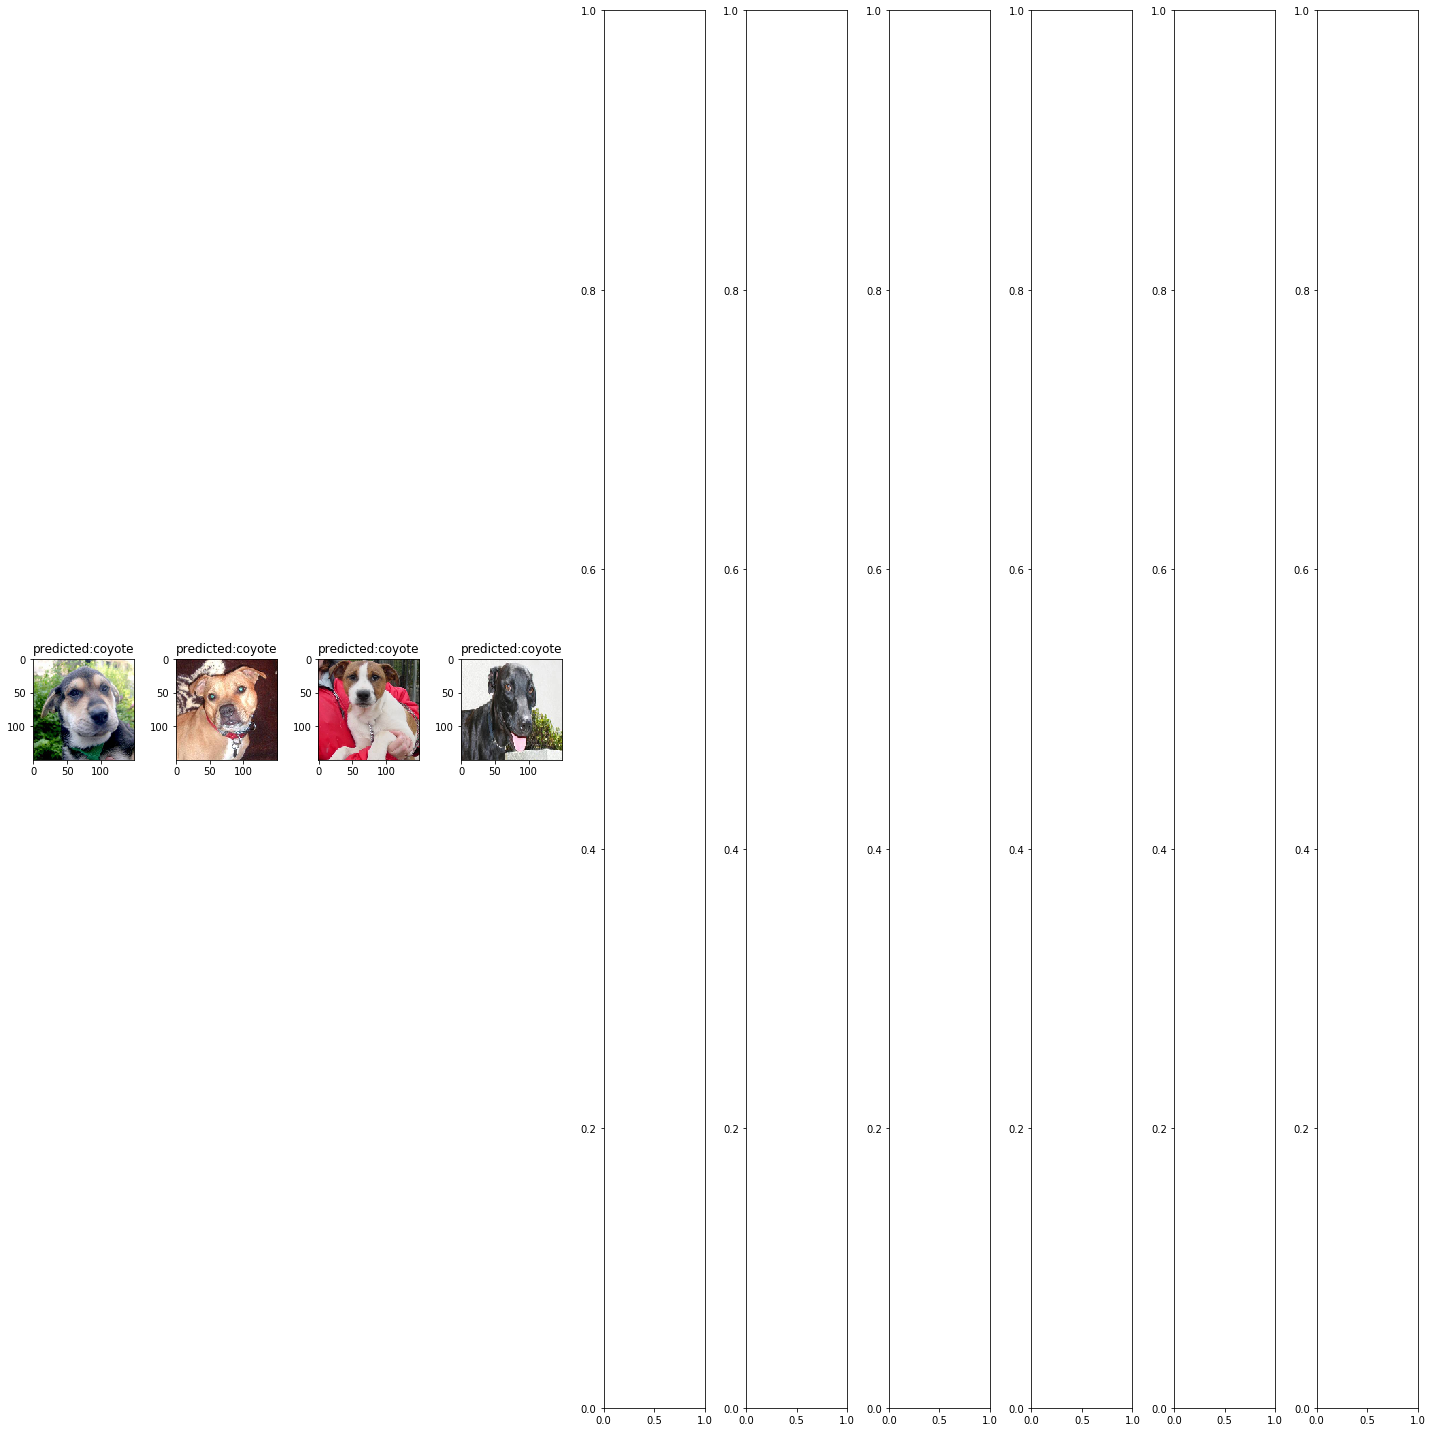

In [42]:
predict_and_plot(model, "./DATA/minicoyo")